In [463]:
import matplotlib.pyplot as plt
import numpy as np

(1389, 8)


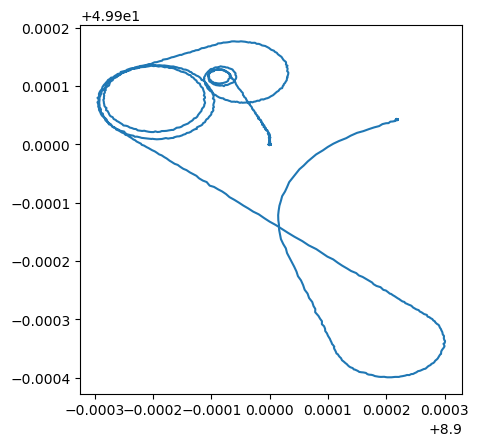

In [482]:
gps_filename = "../dataset/ros_data/gps_to_kfgins_20230619_184246.txt"
# gps_filename= "../dataset/ros_data/gps_to_kfgins_20230619_004957.txt"

gps_filename= "../dataset/ros_data/gps_to_kfgins_20230622_012013.txt"
# gps_filename = "../dataset/GNSS-RTK.txt"
gps_data = np.loadtxt(gps_filename)
print(gps_data.shape)
start, end = 0, 1389
plt.plot(gps_data[start:end, 2], gps_data[start:end, 1])
# set axes scale
plt.gca().set_aspect('equal')

In [483]:
0.0006 * 6300000/180 * 3.14, 0.0002 * 6300000/180 * 3.14, 0.01 * 6300000/180 * 3.14

(65.94, 21.98, 1099.0)

In [484]:
0.000007366 * 6300000/180 * 3.14,

(0.8095234,)

In [559]:
imu_filename = "../dataset/ros_data/imu_to_kfgins_20230619_184246.txt"
#imu_filename = "../dataset/ros_data/imu_to_kfgins_20230619_004957.txt"
imu_filename = "../dataset/ros_data/imu_to_kfgins_20230622_012013.txt"
#imu_filename = "../dataset/Leador-A15.txt"
imu_rate = 100 # Hz
gps_rate = 1
imu_data = np.loadtxt(imu_filename, delimiter=" ")
print(imu_data.shape)
imu_data = imu_data[start*imu_rate//gps_rate:end*imu_rate//gps_rate]

(13896, 8)


In [563]:
initatt = -90.0235133
def dead_reckoning(ts, dwz, dax, day, initatt=initatt/180*np.pi):
    diff_ts = np.diff(ts)
    # append the first element
    diff_ts = np.insert(diff_ts, 0, 1/imu_rate)
    headings = np.cumsum(dwz/180*np.pi) + initatt
    vx = np.cumsum(dax)
    vy = np.cumsum(day)
    dx = np.cumsum(diff_ts * vx * np.cos(headings) - diff_ts * vy * np.sin(headings))
    dy = np.cumsum(diff_ts * vx * np.sin(headings) + diff_ts * vy * np.cos(headings))
    return dx, dy, diff_ts, headings
x, y, diff_ts, headings = dead_reckoning(imu_data[:, 0], -imu_data[:, 3], imu_data[:, 5], -imu_data[:, 4])

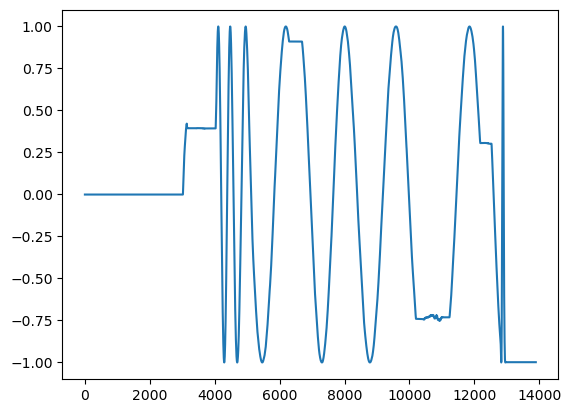

In [564]:
plt.plot(np.cos(headings))

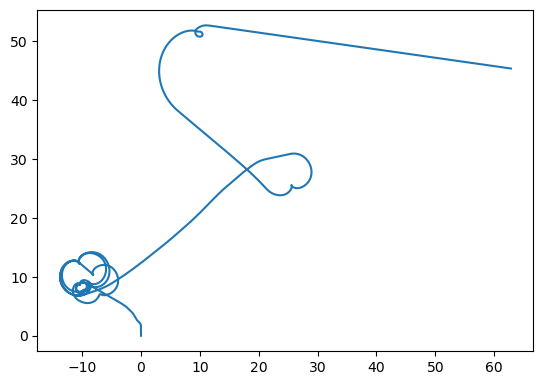

In [565]:
plt.plot(x,y)
plt.gca().set_aspect('equal')

In [454]:
date_time = "20230619_184246"
raw_imu_file = np.loadtxt("../dataset/ros_data/imu_log_" + date_time + ".csv", delimiter=",", skiprows=1)


In [458]:
def quaternion_to_euler_angle(xyzw):
    x,y, z, w = xyzw
    euler_angle = [np.arctan2(2*(w*x + y*z), 1 - 2*(x**2 + y**2)),
                   np.arcsin(2*(w*y - z*x)),
                   np.arctan2(2*(w*z + x*y), 1 - 2*(y**2 + z**2))]
    return euler_angle

yaws = [quaternion_to_euler_angle(raw_imu_file[i, 1:5])[2] for i in range(len(raw_imu_file))]
yaws = np.array(yaws)
ts = raw_imu_file[:, 0]
ts = np.array(ts)
np.diff(yaws)/ np.diff(ts)

array([2.93601594e-08, 3.49373136e-08, 3.91699799e-08, ...,
       4.38694958e-05, 6.04742943e-05, 1.99596169e-05])

In [460]:
imu_data[:, 3]


array([ 7.98733093e-08,  7.85255287e-08,  7.72122735e-08, ...,
       -1.18775083e-06, -3.35841502e-08,  2.62750692e-07])

In [462]:
yaws / 180 * np.pi


array([ 9.00008252e-07,  9.00013376e-07,  9.00019474e-07, ...,
       -3.58506150e-03, -3.58505095e-03, -3.58504746e-03])

In [480]:
np.array(quaternion_to_euler_angle((0,0,0.82, 0.56)))/np.pi*180


array([  0.       ,   0.       , 110.5779201])